<a href="https://colab.research.google.com/github/cstecker/politicsRLab/blob/main/Demokratieentstehung%20und%20Demokratiestabilit%C3%A4t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Demokratien analysieren mit V-DEM**

## **Setup**

Zu Beginn laden wir uns wieder die Pakete, die wir benötigen. Hier brauchen wir zunächst das *tidyverse* und *vdemdata*, um den Datensatz für heute zu laden.

In [ ]:
library(tidyverse)
library(devtools)
install_github("vdeminstitute/vdemdata")
library(vdemdata)

Skipping install of 'vdemdata' from a github remote, the SHA1 (3030ccf0) has not changed since last install.
  Use `force = TRUE` to force installation



## **Der V-DEM Datensatz**

“Varieties of Democracy”, kurz [V-Dem](https://v-dem.net/) ist das Datensammelprojekt zur Demokratieentwicklung und Demokratiequalität. Im Gegensatz zu Freedom House oder Polity IV trifft V-Dem nicht nur allgemeine Aussagen über den Zustand demokratischer Institutionen und Freiheiten, sondern liefert sehr viele konkrete Variablen, die einen nuancierten Blick ermöglichen. So gibt V-Dem z. B. auch Aufschluss über die Wissenschaftsfreiheit oder Zensur im Internet.

Für uns besonders interessant ist die Verbindung von politischen Variablen mit ökonomischen, geographischen und soziologischen Variablen. So lassen sich bekannte Theorien zur Demokratisierung untersuchen. Die Zeitreihe des Projekts ist ebenfalls beachtlich. Der Kern der Daten beginnt, wie so oft, nach dem zweiten Weltkrieg, doch die Forscherinnen und Forscher der Univeristät Göteborg haben für einige Länder den Grad der Demokratisierung bis 1789 ermittelt – da hatten wir uns auf dem heutigen Territorium Deutschlands gerade langsam vom Absolutismus verabschiedet.

Die Daten kommen mit dem praktischen R-Package, das wir oben bereits geladen haben. Dazu gibt es auch eine [Dokumentation auf github](https://github.com/vdeminstitute/vdemdata). Schauen wir uns die Daten mal an. Der Datensatz ist hhhuuuuge und er hat auch the best data. Schauen wir mal wieviele Zeilen und Variablen der Datensatz hat. Also seine Dimensionen:



In [ ]:
dim(vdem)

Die erste Zahl steht für die Anzahl an Beobachtungen im Datensatz. Die zweite Zahl hingegen steht für die Anzahl an Variablen. Wir sehen sofort, dass dieser Datensatz sehr viel zu bieten hat! `glimpse()` bietet uns eine weitere Perspektive auf den Datensatz.

In [ ]:
glimpse(vdem)

Schließlich können wir auch die oft vertraute "Excel-Perspektive" konsultieren (dazu wählen wir uns die ersten zehn Zeilen aus):

In [ ]:
vdem %>%
    filter(row_number() < 10)  %>%
    View()

Werfen wir noch einen Blick auf Deutschland, indem wir den Datensatz in der Variable *country_name* filtern.

In [ ]:
vdem %>%
    filter(country_name == "Germany")  %>%
    View()

Wir sehen, dass er nach Länderjahren aufgebaut ist, also jede Zeile beinhaltet Informationen (in den Spalten) über ein Land in einem bestimmten Jahr.
Bei einem so riesigen Datensatz braucht man verschiedene Wegweiser, um sich zurechtzufinden. Ein wichtiger Wegweiser ist das [Codebook](https://www.v-dem.net/static/website/img/refs/codebookv111.pdf). Öffnen Sie es mal und stöbern etwas.
Auch innerhalb des R-Packages gibt es einige Wegweiser. Wir können z. B. gezielt den Inhalt einzelner Variablen abfragen. Die Variable `v2x_regime` werden wir im Folgenden nutzen. Was verbirgt sich dahinter?

In [ ]:
var_info("v2x_regime")

$question_id
[1] 2707

$question_number
[1] 1

$metasection
[1] "D"

$name
[1] "Regimes of the world -- the RoW measure"

$vartype
[1] "D"

$cb_section
[1] "x3regime"

$tag
[1] "v2x_regime"

$projectmanager
[1] " Marcus Tannenberg, Staffan I Lindberg"

$question
[1] "How can the political regime overall be classified considering the competitiveness of access to power (polyarchy) as well as liberal principles?"

$clarification
[1] NA

$responses
[1] "0: Closed autocracy: No multiparty elections for the chief executive or the legislature. \\smallskip\n1: Electoral autocracy: De-jure multiparty elections for the chief executive and the legislature, but failing to achieve that elections are free and fair, or de-facto multiparty, or a minimum level of Dahl’s institutional prerequisites of polyarchy as measured by V-Dem’s Electoral Democracy Index (v2x\\_polyarchy). \\smallskip \n2: Electoral democracy: De-facto free and fair multiparty elections and a minimum level of Dahl’s institutional prerequisites for polyarchy as measured by V- Dem’s Electoral Democracy Index (v2x\\_polyarchy), but either access to justice, or transparent law enforcement, or liberal principles of respect for personal liberties, rule of law, and judicial as well as legislative constraints on the executive not satisfied as measured by V-Dem’s Liberal Component Index (v2x\\_liberal). \\smallskip\n3: Liberal democracy: De-facto free and fair multiparty elections and a minimum level of Dahl’s institutional prerequisites for polyarchy as measured by V- Dem’s Electoral Democracy Index (v2x\\_polyarchy) are guaranteed as well as access to justice, transparent law enforcement and the liberal principles of respect for personal liberties, rule of law, and judicial as well as legislative constraints on the executive satisfied as measured by V-Dem’s Liberal Component Index (v2x\\_liberal). \\smallskip"

$ordering
[1] NA

$scale
[1] "Ordinal."

$answertype
[1] NA

$sources
[1] "v2x\\_elecreg v2xlg\\_elecreg v2xex\\_elecreg v2elmulpar\\_osp_ex v2elmulpar\\_osp\\_leg v2elmulpar\\_osp v2elfrfair\\_osp v2elfrfair\\_osp\\_leg v2elfrfair\\_osp\\_ex v2expathhg v2expathhs v2ex\\_legconhos v2ex\\_hosw v2x\\_polyarchy v2x\\_liberal v2clacjstm\\_osp v2clacjstw\\_osp v2cltrnslw\\_osp v2exaphogp"

$notes
[1] NA

$datarelease
[1] "9-13."

$citation
[1] "Lührmann \\textit{et al.}  (2018); \\textit{V-Dem Codebook} (see suggested citation at the top of this document)."

$coverage
[1] "1900-2017"

$subsetof
[1] NA

$crosscoder_aggregation
[1] NA

$aggregation
[1] "Electoral democracies score above 2 on the indicators for multi--party (v2elmulpar\\_osp) and free and fair elections (v2elfrfair\\_osp), as well as above 0.5 on the Electoral Democracy Index (v2x\\_polyarchy). Liberal democracy meets the criteria for Electoral democracy but also satisfy the liberal dimensions by a score above 0.8 on the V--Dem Liberal Component index (v2x\\_liberal), as well as a score above 3 on transparent law enforcement (v2cltrnslw\\_osp), access to justice for men (v2clacjstm\\_osp) and women (v2clacjstw\\_osp). Electoral autocracies fail to meet one or more of the above--mentioned criteria of electoral democracies, but subject the chief executive and the legislature to de--jure multiparty elections as indicated by a score above 1 on the V--Dem multiparty elections indicator (v2elmulpar\\_osp). Closed autocracy if either no multiparty elections for the legislature take place (v2xlg\\_elecreg == 0) or the chief executive is not elected in direct or indirect multiparty elections. To identify whether this is the case, we take into account if there is no basic multiparty competition in elections (v2elmulpar\\_osp < 1) and the relative power of the Head of State (HoS) and the Head of Government (HoG) as well as the appointment procedures. The V--Dem variable v2ex\\_hosw identifies if the HoS (v2ex\\_hosw > 0.5) or HoG (v2ex\\_hosw < or equal to 0.5) is the chief executive. If the HoG is the chief executive, the v

## **Zeitliche Entwicklung von Demokratien**

Die Demokratieforschung fragt u.a., wie sich die Demokratie verbreitet und wo es zu Rückfällen in autokratische Systeme kommt. Machen wir uns doch selbst ein Bild über die Entwicklung von Demokratien über Zeit. Die Variable *v2x_regime* trifft darüber eine Aussage und unterteilt alle Länderjahre in closed autocracies, electoral autocracies, electoral democracies und liberal democracies.

Schauen wir uns die zeitliche Entwicklung mal graphisch an. Dazu müssen wir die Daten allerdings erst ein wenig bearbeiten – data wrangling mit dem tidyverse. Die einzelnen Befehle fügen wir wieder mit der pipe, *%>%*, zusammen. Für die Visualisierung nutzen wir das uns schon bekannte *ggplot* (Achtung: im Grafikbefehl werden die Elemente mit “+” aneinandergefügt):

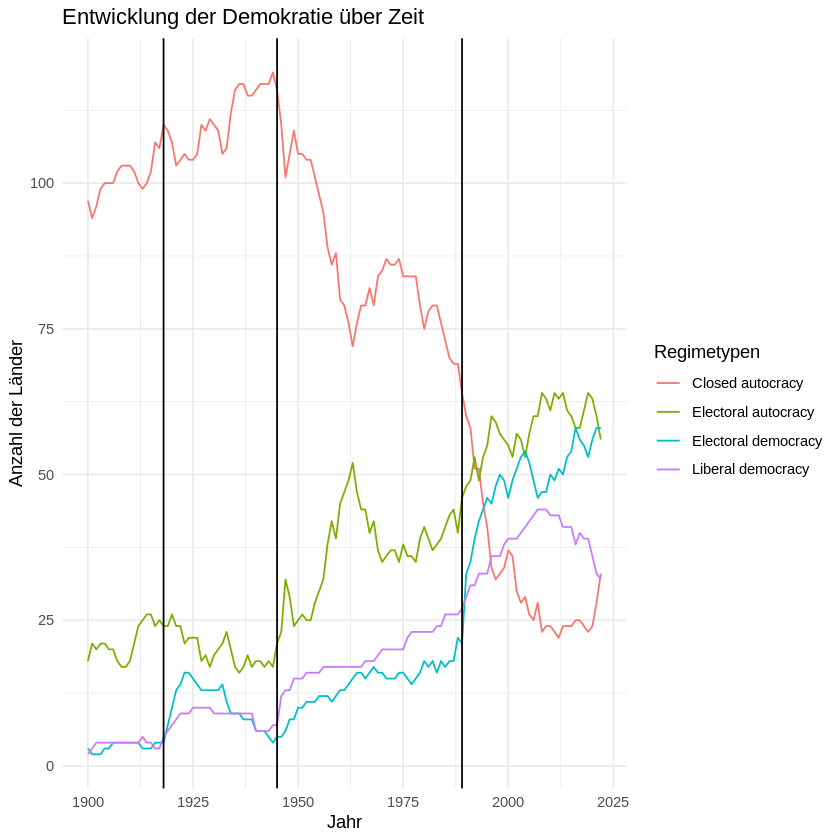

In [ ]:
vdem %>%
  # Lösche alle Zeilen mit missings
  drop_na(v2x_regime) %>%
  # Gruppiere nach Jahr
  group_by(year) %>%
  # Zähle für jedes Jahr die Häufigkeit der einzelnen Regime-Types
  count(v2x_regime) %>%
  # Schiebe die Daten in ein ggplot
  ggplot(
    # Schreibe die Jahre auf die x-Achse, die Häufigkeiten der regime-types auf die y-Achse
    aes(x = year, y = n,
        # färbe die Linien nach den unterschiedlichen Regime-Types
        color = factor(v2x_regime, levels = c(0, 1, 2, 3),
                       labels = c("Closed autocracy", "Electoral autocracy", "Electoral democracy",
                                  "Liberal democracy")), na.rm = TRUE))+
  # Stelle die Daten als Linie dar
  geom_line() +
  # Füge eine vertikale Referenzlinie für das Ende der Weltkriege und
  # die Demokratisierung des Ostblocks ein
  geom_vline(xintercept = c(1918, 1945, 1989)) +
  # Beschrifte die Abbildung und die Achsen
  labs(title = "Entwicklung der Demokratie über Zeit",
       x = "Jahr", y = "Anzahl der Länder") +
  # Definiere die Legende
  guides(color=guide_legend("Regimetypen"))+
  # wähle das theme_minimal, damit Dich Deine R-buddies nicht mehr dissen, weil Du noch das
  # Standardtheme verwendest.
  theme_minimal()

Sehr schick und aussagekräftig! Spielen Sie mal ausführlich mit diesem Befehl herum, um die einzelnen Teile besser zu verstehen. Am besten geht das, wenn man die Zeilen nacheinander ausführt. Das ist im colab etwas umständlicher. Sie müssen nach und nach die Zeilen eingeben und dann ausführen.

In [ ]:
vdem %>%
  # Lösche alle Zeilen mit missings
  drop_na(v2x_regime)

Im Datensatz sind die Regiemtypen für jedes Land und Jahr als kategoriale Variable (0 bis 3) aufgeführt. Um diese kumulierte Darstellung zu erreichen, müssen Sie zunächst die Summe der Regimetypen pro Jahr berechnen und dann differenziert nach Regiemtyp darstellen. Dies geschieht im Befehl in zwei Schritten. Zunächst wird mit *group_by(year)* spezifiziert, dass alle folgenden Befehle nach Jahren getrennt durchgeführt werden sollen. Sie wollen ja nicht die globale Summe berechnen, sondern für jedes Jahr. Mit *count(v2x_regime)* folgt ein Befehl ähnlich wie *mutate()*. *count()* erstellt eine Variable n, die die Summe der Ausprägungen darstellt. Dies hatten wir auch schon bei der Auswertung der Kursumfrage genutzt. Werfen wir einen genauen Blick auf den Befehl und sein Ergebnis:

In [ ]:
vdem %>%
  drop_na(v2x_regime) %>%
  group_by(year) %>%
  count(v2x_regime)

Sie sehen übersichtlich die neue Datenstruktur aus der dann der Graph erstellt wird. Im Graphikbefehl wird dann mit der Option *color = factor(v2x_regime, ...)* zusätzlich festgelegt, dass farblich nach dem Wert der Variable *v2x_regime*, also dem Regimtyp, differenziert werden soll.

Mit diesen Befehlen haben wir nun die Entwicklung und Verteilung verschiedener Regimetypen nach dem V-Dem Datensatz visualisiert. Wichtige historische Entwicklungen, wie das Ende der Weltkriege oder der Zerfall der Sowjetunion sind gut in den Daten zu erkennen (Kommentieren Sie doch mal die Zeile der geom_vline heraus, indem Sie ein “#” davorsetzen. Dann sehen Sie, dass die vertikalen Referenzlinien verschwinden). Ebenfalls sehen wir, dass seit ca. 2010 zum ersten Mal seit Jahrzehnten liberale Demokratien auf dem Rückzug sind und sich Autokratien ausbreiten.

## **Demokratie nach Dahl**

Nach einem ersten Blick auf die V-Dem Daten gehen wir weiter in die Details der einzelnen Variablen. Die Variable v2x_polyarchy beschreibt den elektoralen Demokratieindex, der das Prinzip der elektoralen Demokratie misst. Eine ideale Umsetzung würde den Wert 1 annehmen, das Gegenteil den Wert 0. Damit können Sie bereits genenauere Aussagen über den Zustand von Demokratien im Vergleich und in ihrer Entwicklung treffen. Im nächsten Schritt wollen wir die Entwicklung dieses Indizes für Deutschland (von 1949 bis 1991 nur Westdeutschland), Polen, Ungarn und Tunesien visualisieren:

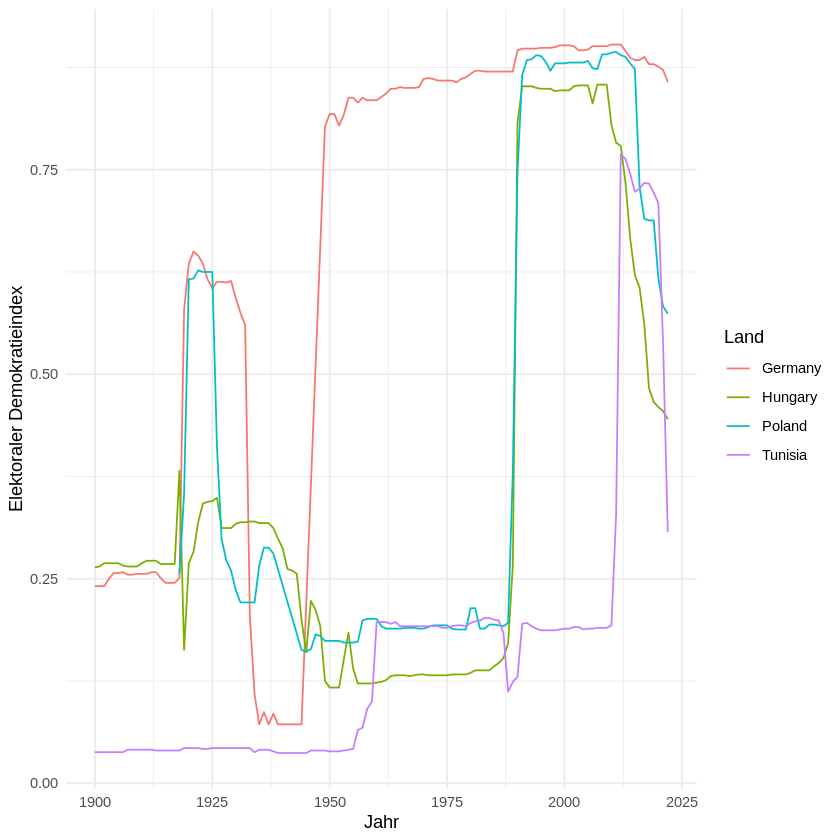

In [ ]:
vdem %>%
  filter(year > 1899) %>%
  filter(country_name == "Germany" | country_name == "Poland" | country_name == "Hungary" | country_name == "Tunisia") %>%
  ggplot() +
  geom_line(mapping = aes(x= year, y=v2x_polyarchy, color = country_name)) +
  labs(x = "Jahr", y = "Elektoraler Demokratieindex", color = "Land") +
  theme_minimal()

Gut zu erkennen ist die Demokratisierung Deutschlands mit der Weimarer Republik. Sie erinnern sich, 1919 haben wir Kaiser Wilhelm davongejagt und bis heute warten [seine darbenden Nachkommen auf eine angemessene Entschädigung für das ihnen ergangene Unrecht](https://www.rnd.de/politik/historikerstreit-in-deutschland-kaiser-nachfahren-wollen-entschaedigung-trotz-ns-kollaboration-LUGQGWLLERE73EOSCARV5WE24M.html). Ab 1933 erkennen wir den Aufstieg des Nationalsozialismus (dem die Hohenzollern nach herrschender Meinung erheblich Vorschub geleistet haben). Schließlich wird die Demokratie ab 1949 wieder bzw. von Außen in Deutschland etabliert. Für Ungarn und Polen erkennen Sie die Demokratisierung nach dem Fall des Eisernen Vorhangs und den bemerkenswerten Abstieg seit 2010. In Tunesien sind u.a. die Erfolge des arabischen Frühlings erkennbar.

## ***Aufgabe***: *Demokratieentwicklung darstellen*

In [ ]:
# Aufgabe: Stellen Sie die Demokratieentwicklung von drei Ländern Ihrer Wahl dar und kommentieren Sie diese kurz.
vdem %>%
  # hier sollte Ihr Code stehen

Aus der Vorlesung wissen Sie, dass Dahl die ideale real existierende Demokratie als Polyarchie bezeichnet. Sein Konzept beinhaltet zwei Dimensionen: Inklusion und Wettbewerb (“inclusion open to contestation”). Die Konzeption Dahls hat auch Einzug in die Methodik des V-Dem gefunden, sodass wir Werte und Indizes vorliegen haben, mit wir die Länder in Dahls Konzept verorten können.

Als Inklusionswert einer Demokratie ziehen wir die Variable *v2x_partipdem* heran (siehe Codebuch). Dies ist der Participatory democracy index, der erhebt inwieweit das Ideal der partizipativen Demokratie erreicht wird (Maximalwert 4). Um die Wettberwerbsdimension zu ermitteln, ziehen wir die Variable *v2elfrfair*, den clean election index (siehe Codebuch), heran. Dieser ermittelt inwieweit Wahlen fair und frei sind. Dies gilt insbesondere für den Grad des fairen Wettbewerbs unter Parteien. Da die Variable *v2elfrfair* nur in Jahren von Wahlen erhoben wird, erstellen wir zunächst die Variable elecfair und übertragen bei fehlenden Werten die Werte der letzten Wahl.

In [ ]:
#Lücken in v2elfrfair zu füllen. NAs werden durch Vorjahreswerte ersetzt
vdem <- vdem %>%
  mutate(elecfair = v2elfrfair) %>%
  fill(elecfair, .direction = "down")

Danach bilden wir nun die beiden Dimensionen in einem Plot ab. Ausgewählt wurden folgende Länder:

*   Schweiz (*CHE*)
*   Deutschland (*DEU*)
*   Vereinigte Staaten (*USA*)
*   Russland (von 1919 bis 1990 Sovietunion) (*RUS*)
*   China (*CHN*)
*   Frankreich (*FRA*)

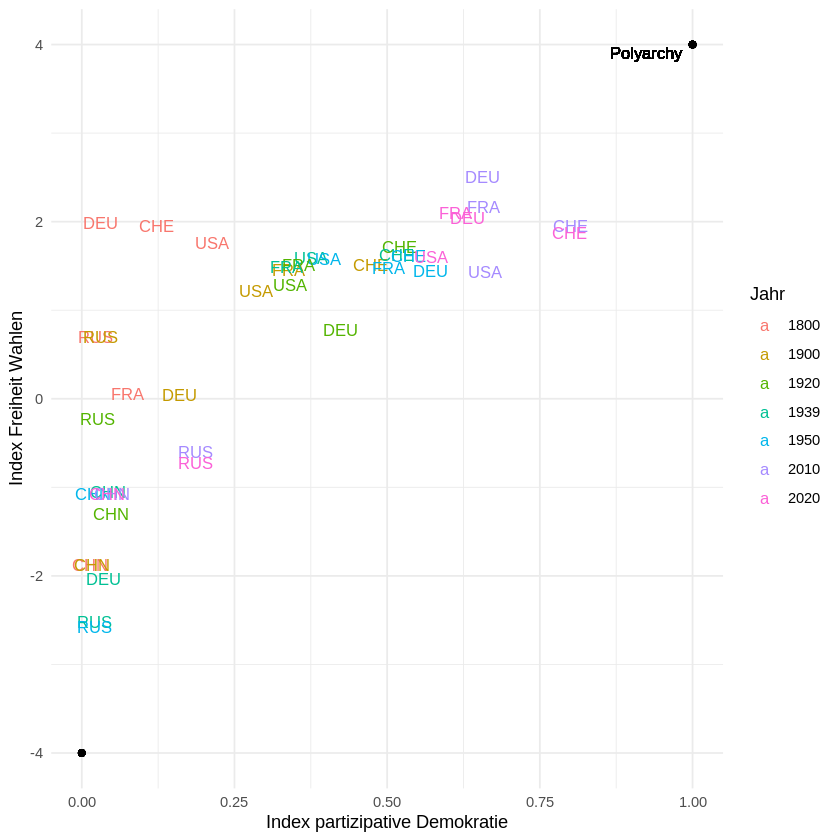

In [ ]:
vdem %>%  #Graph Demokratie nach Dahl ausgewählte Länder
  filter(country_name == "Switzerland" | country_name == "Germany" | country_name == "United States of America" |
           country_name == "Russia" | country_name == "China" | country_name == "France") %>%
  filter(year == 1800 | year == 1900 | year == 1920 | year == 1939 | year == 1950 | year == 2010 | year == 2020) %>%
  ggplot() +
  geom_text(size = 3.5, aes(x=.9, y=3.9, label = "Polyarchy", hjust = 0.3)) +
  geom_point(aes(x=1, y=4)) +
  geom_point(aes(x=0, y=-4)) +
  geom_text(size = 3.5, check_overlap = FALSE, aes(x = v2x_partipdem, y = elecfair, label = country_text_id, color = factor(year))) +
  labs(x = "Index partizipative Demokratie",  y = "Index Freiheit Wahlen", color = "Jahr") +
  xlim(c(0, 1)) +
  ylim(c(-4, 4)) +
  theme_minimal()

Für diese Darstellung wurde das Geom *geom_text* verwendet. Im Gegensatz zu bisher verwendeten Geomen gibt dieses Text als Punkte aus, sodass hier sehr einfach zwischen den Staaten unterschieden werden kann. Welchen Text das Geom anzeigt kann mit der Option *label = Variable* festgelegt werden.

## ***Aufgabe***: *Index darstellen*
Stellen Sie separate Abbildungen für den Index der partizipativen Demokratie und dem Index Freiheit der Wahlen dar. Und zwar separat für die Schweiz, Südafrika und Ungarn dar. Wie können Sie die Veränderungen erklären?

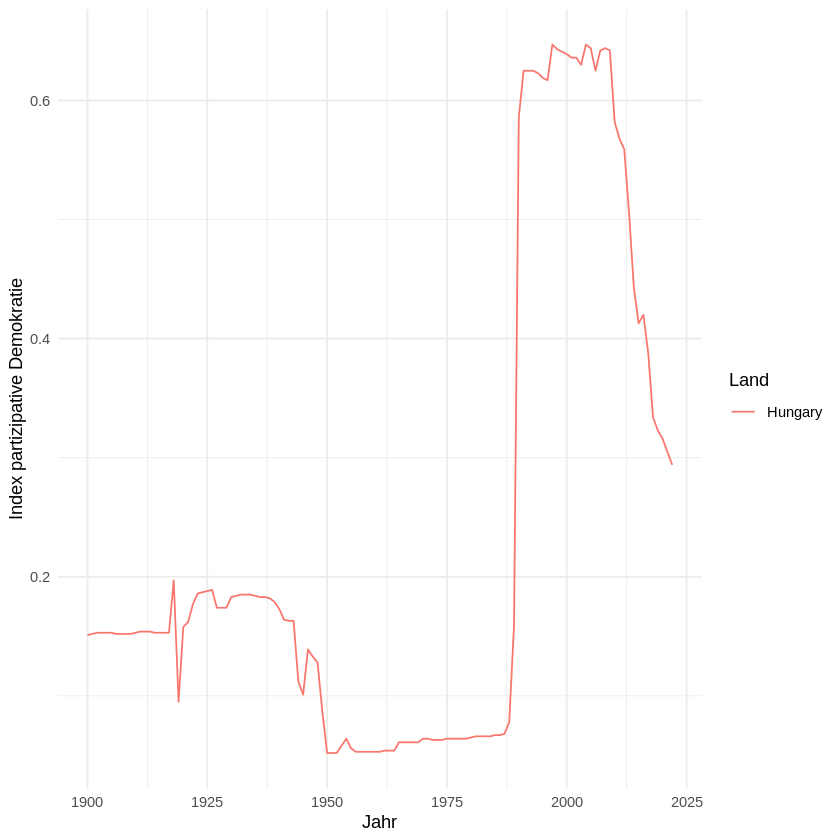

In [ ]:
# Index partizipative Demokratie
vdem %>%
  filter(year > 1899) %>%
  filter(country_name == "Hungary") %>%
  ggplot() +
  geom_line(mapping = aes(x = year, y = v2x_partipdem, color = country_name)) +
  labs(x = "Jahr", y = "Index partizipative Demokratie", color = "Land") +
  theme_minimal()

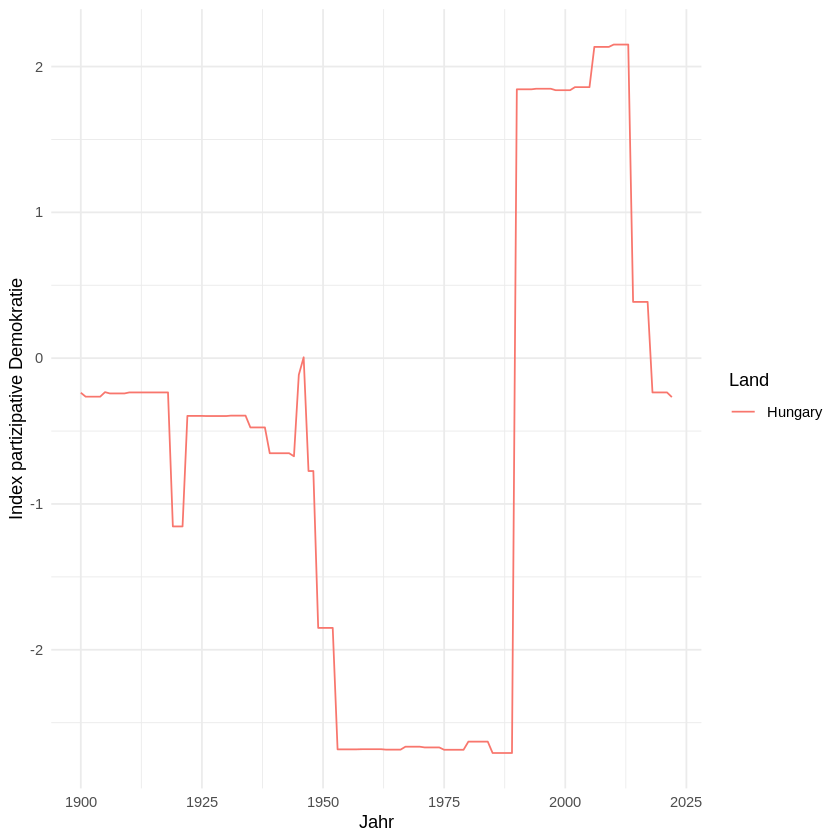

In [ ]:
# Index Freiheit der Wahlen
  vdem %>%
  filter(year > 1899) %>%
  filter(country_name == "Hungary") %>%
  ggplot() +
  geom_line(mapping = aes(x= year, y = elecfair, color = country_name)) +
  labs(x = "Jahr", y = "Index Freiheit Wahlen", color = "Land") +
  theme_minimal()